# 第４章: 形態素解析

In [1]:
#!mecab data/neko.txt > "data/neko.txt.mecab"

In [2]:
!wc -l data/neko.txt
!wc -l data/neko.txt.mecab

9964 data/neko.txt
216302 data/neko.txt.mecab


In [3]:
!head data/neko.txt
!echo ".\n.\n.\n"
!tail data/neko.txt

一

　吾輩は猫である。
名前はまだ無い。

　どこで生れたかとんと見当がつかぬ。
何でも薄暗いじめじめした所でニャーニャー泣いていた事だけは記憶している。
吾輩はここで始めて人間というものを見た。
しかもあとで聞くとそれは書生という人間中で一番獰悪な種族であったそうだ。
この書生というのは時々我々を捕えて煮て食うという話である。
.
.
.

どこにどうしていても差支えはない。
ただ楽である。
否楽そのものすらも感じ得ない。
日月を切り落し、天地を粉韲して不可思議の太平に入る。
吾輩は死ぬ。
死んでこの太平を得る。
太平は死ななければ得られぬ。
南無阿弥陀仏南無阿弥陀仏。
ありがたいありがたい。



In [4]:
!head -n12 data/neko.txt.mecab
!echo ".\n.\n.\n"
!tail data/neko.txt.mecab

一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
.
.
.

EOS
南無阿弥陀仏	名詞,一般,*,*,*,*,南無阿弥陀仏,ナムアミダブツ,ナムアミダブツ
南無阿弥陀仏	名詞,一般,*,*,*,*,南無阿弥陀仏,ナムアミダブツ,ナムアミダブツ
。	記号,句点,*,*,*,*,。,。,。
EOS
ありがたい	形容詞,自立,*,*,形容詞・アウオ段,基本形,ありがたい,アリガタイ,アリガタイ
ありがたい	形容詞,自立,*,*,形容詞・アウオ段,基本形,ありがたい,アリガタイ,アリガタイ
。	記号,句点,*,*,*,*,。,。,。
EOS
EOS


# 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [5]:
infile_path = "data/neko.txt.mecab"

In [6]:
import itertools
from pprint import pprint

In [7]:
def parse_morpheme(line):
    val = line.replace('\t',',').split(',')
    return {'surface':val[0],'base':val[-3],'pos':val[1],'pos1':val[2]}

def parse_line(group):
    return [parse_morpheme(line) for line in group]

def read_mecab(file):#generator関数
    for value,group in itertools.groupby(file,key=lambda line: line!='EOS\n'):
        if value : yield parse_line(group)

with open(infile_path) as f:
    for ls in itertools.islice(read_mecab(f),3):
        pprint(ls)

[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'}]
[{'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]
[{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
 {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}]


### memo
- 正規表現は遅い

# 31. 動詞

動詞の表層形をすべて抽出せよ．

In [8]:
def find_morpheme(f,key,val):
    return (dic for ls in read_mecab(f)
                for dic in ls 
                if dic[key] == val)

In [9]:
with open(infile_path) as f:
    ls = [dic["surface"] for dic in find_morpheme(f,"pos","動詞")]
print(len(ls))
print(ls[:10])

28905
['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']


# 32. 動詞の原形

動詞の原形をすべて抽出せよ．

In [10]:
with open(infile_path) as f:
    ls = [dic["base"] for dic in find_morpheme(f,"pos","動詞")]
print(ls[:10])

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']


### memo
- tqdm
- heat

# 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ

In [11]:
import collections

In [12]:
def window(iterable,width):
    que = collections.deque(maxlen=width)
    for i in iterable:
        que.append(i)
        if len(que) == width : yield que

In [13]:
#example
ls = [1,2,3,4,5]
for i in window(ls,3):
    print(i)

deque([1, 2, 3], maxlen=3)
deque([2, 3, 4], maxlen=3)
deque([3, 4, 5], maxlen=3)


In [14]:
def noun_no_noun(f):
    for ls in read_mecab(f):
        for left,mid,right in window(ls,3):
            if left['pos'] == '名詞' and mid['surface'] == 'の' and right['pos'] == '名詞':
                yield ''.join(morpheme['surface'] for morpheme in [left,mid,right])

with open(infile_path) as f:
    ls = [i for i in noun_no_noun(f)]
    
print(len(ls))
print(ls[:10])

6044
['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']


### memo
- 「の」から始めると良さそう
- 名詞から始めると事故る
- toolz.itertoolz -> sliding_window
- try,except

In [15]:
#ex)

# try:
#     pass
# except: IndexError
#     pass

# 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [16]:
noun_length = 7 #連接の長さ

In [17]:
def noun_seq(f):
    for ls in read_mecab(f):
        for value,group in itertools.groupby(ls,key=lambda dic:dic['pos']=='名詞'):
            if not value: continue
            tpl = tuple(group)
            if len(tpl) >= noun_length: yield ''.join(dic['surface'] for dic in tpl)
                
with open(infile_path) as f:
     ls = [i for i in noun_seq(f)]

pprint(ls)

['三毛子さん三毛子さん',
 "manyaslip'twixtthecupandthelip",
 '四時十五分前頃',
 '八万八千八百八十本',
 '千七百八十六年',
 '八百八十八株半',
 '明治三十八年何月何日戸締り',
 'みんな七十五日以上経過',
 '三十五反八分七',
 '通り一昨々年以来二三野心家',
 '珍野苦沙弥先生虎皮下',
 '明治十一年九月廿八日',
 '文明中学二年生古井武右衛門',
 '古井武右衛門君一人',
 '六十二回六十三回']


# 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [18]:
def word_freq(f,pos=None):
    return collections.Counter(dic['base'] if dic['base']!='*' else dic['surface'] 
                               for ls in read_mecab(f) 
                               for dic in ls 
                               if pos==None or dic['pos']==pos)

In [19]:
with open(infile_path) as f:
    #全ての単語
    all_words_freq = word_freq(f)
    print('~all words top10~')
    pprint(all_words_freq.most_common(10))
    
    #動詞
    f.seek(0)
    verb_freq = word_freq(f,'動詞')
    print('~verb top10~')
    pprint(verb_freq.most_common(10))
    
    #名詞
    f.seek(0)
    noun_freq = word_freq(f,'名詞')
    print('~noun top10~')
    pprint(noun_freq.most_common(10))

~all words top10~
[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5975),
 ('と', 5508),
 ('が', 5337)]
~verb top10~
[('する', 3657),
 ('いる', 1777),
 ('云う', 1408),
 ('なる', 1120),
 ('ある', 1081),
 ('見る', 675),
 ('思う', 502),
 ('来る', 459),
 ('れる', 450),
 ('聞く', 347)]
~noun top10~
[('の', 1611),
 ('事', 1207),
 ('もの', 981),
 ('君', 973),
 ('主人', 932),
 ('ん', 704),
 ('よう', 696),
 ('人', 602),
 ('一', 554),
 ('何', 539)]


### memo

In [20]:
# collections.Counter.update

# インスタンスを生成するコストは大きいので避けるべき

# itertools.chain
    #バラせる
# itertools.chain.from_iterable
    #全部出せる
    
#defaultdict
# ex)
# count_dict = defaultdict(lambda: 0)
# count_dict = defaultdict(int)
# count_dict = defaultdict(list)

#setdefaultもある(defaultdic推奨)
#ex)
# dic.setdefault(key,default)

# dic.get(key,default)

In [21]:
from itertools import chain, islice
from collections import Counter, defaultdict

In [22]:
test1 = [(1,2),(3,4),(5,6)]
for i in test1:
    print(i)

for i in chain.from_iterable(test1):
    print(i)

(1, 2)
(3, 4)
(5, 6)
1
2
3
4
5
6


In [23]:
#defaultdict
hoge = defaultdict(int)
hoge['fuga'] = 1
print(hoge['fuga'], hoge['unk'])



1 0


# 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [24]:
%matplotlib inline

In [25]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
def fig_option(title, xlabel='Words', ylabel='Frequency'):
    plt.tick_params(labelsize = 20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title,fontsize=20)

### 色々フォントを変えようとしたが失敗。表示されてない箇所があるが、AppleGothicで妥協

In [27]:
mpl.rcParams['font.family'] = 'AppleGothic'
plt.style.use('ggplot')

### matplotlib
- [matplotlib](https://matplotlib.org)
    - [bar](https://pythondatascience.plavox.info/matplotlib/棒グラフ)
    - [color](https://html-color-codes.info/japanese/)

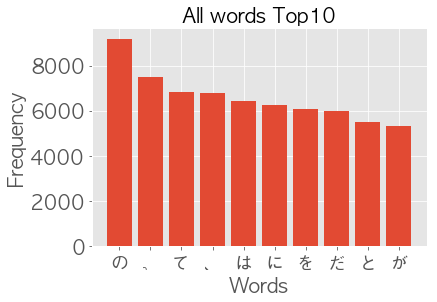

In [28]:
X_axis, Y_axis = zip(*all_words_freq.most_common(10))
plt.bar(range(10), Y_axis, tick_label = X_axis)
fig_option('All words Top10')

### pandas

In [29]:
import pandas as pd

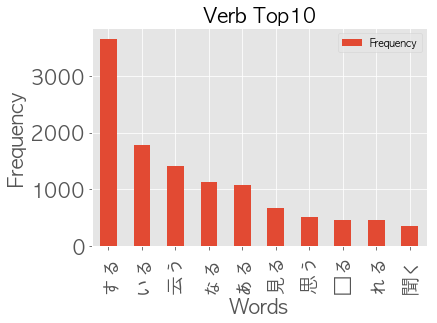

In [30]:
df = pd.DataFrame(verb_freq.most_common(10),columns=['Word','Frequency'])
df.set_index('Word').plot.bar()
fig_option('Verb Top10')

### seaborn

In [31]:
import seaborn as sns

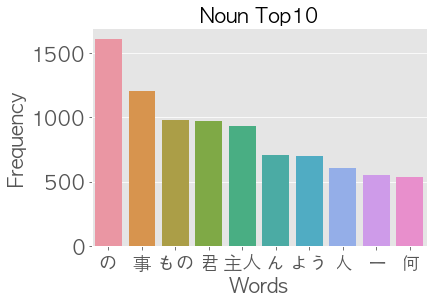

In [32]:
X_axis, Y_axis = zip(*noun_freq.most_common(10))
sns.barplot(x=list(X_axis),y=list(Y_axis))
fig_option('Noun Top10')

### memo

In [33]:
# import matplotlib.font_manager as fm
# fm.findSystemFonts()

In [34]:
# !wget https://launchpad.net/takao-fonts/trunk/15.03/+download/TakaoFonts_00303.01.zip -P data/

In [35]:
# !unzip -d data/ data/TakaoFonts_00303.01.zip

In [36]:
# !cp data/TakaoFonts_00303.01/TakaoGothic.ttf /Users/konnoryuto/Library/Fonts

In [37]:
!ls /Users/konnoryuto/Library/Fonts

TakaoGothic.ttf


Text(0.5,1,'やったぜ。')

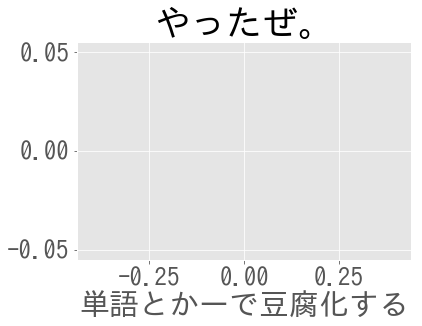

In [38]:
mpl.rcParams['font.family'] = 'TakaoGothic'
plt.rcParams["font.size"] = 25
plt.bar(0, 0)
plt.xlabel('単語とかーで豆腐化する')
plt.title('やったぜ。')

# 37.「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [39]:
def search_word_inline(ls,word):
    for dic in ls:
        if dic['surface']!=word: continue
        return True
    return False

In [40]:
def get_line_withword(mecab_f,word):
    return (ls for ls in mecab_f if search_word_inline(ls,word))

In [41]:
def co_occurrence(mecab_f,word,pos=None):
    return collections.Counter(dic['base'] if dic['base']!='*' else dic['surface'] 
                               for ls in get_line_withword(mecab_f,word) 
                               for dic in ls 
                               if (dic['pos']==pos or pos==None) and dic['surface']!=word)

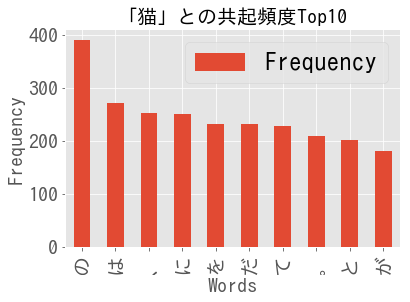

In [42]:
with open(infile_path) as f:
    neko_allwords = co_occurrence(read_mecab(f),'猫')
    
    df = pd.DataFrame(neko_allwords.most_common(10),columns=['Word','Frequency'])
    df.set_index('Word').plot.bar()
    fig_option('「猫」との共起頻度Top10')

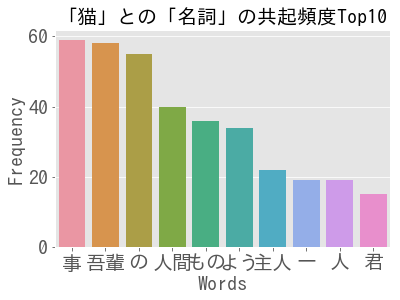

In [43]:
with open(infile_path) as f:
    neko_verb = co_occurrence(read_mecab(f),'猫','名詞')
    
    X_axis, Y_axis = zip(*neko_verb.most_common(10))
    sns.barplot(x=list(X_axis),y=list(Y_axis))
    fig_option('「猫」との「名詞」の共起頻度Top10')

### memo

In [44]:
# itertools.filterfalse
# 連語について「サイコロの本」

# 38. ヒストグラム

単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

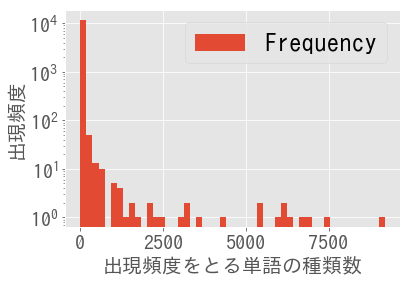

In [45]:
df = pd.DataFrame(all_words_freq.most_common(),columns=['word','Frequency'])
df.plot.hist(log=True,bins=50)
fig_option('','出現頻度をとる単語の種類数','出現頻度')

# 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

/Users/konnoryuto/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/axes/_base.py:2923: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


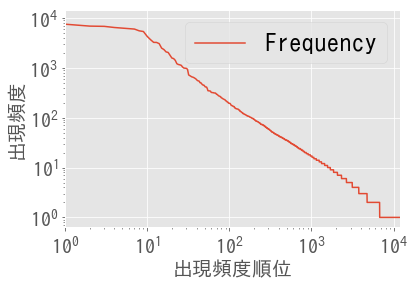

In [46]:
df.plot(loglog=True)
fig_option('','出現頻度順位','出現頻度')

### memo

In [47]:
#plt.xkcd()